<a href="https://colab.research.google.com/github/yash83085/SL-3/blob/main/NLP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7) Text Analytics
1. Extract Sample document and apply following document preprocessing methods:
Tokenization, POS Tagging, stop words removal, Stemming and Lemmatization.
2. Create representation of documents by calculating Term Frequency and Inverse
DocumentFrequency

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing pandas library
import pandas as pd
#Loading the dataset to the varibale df
df=pd.read_csv('/content/drive/MyDrive/SL3/EXPERIMENT-7/train.csv')
#Displaying the structure of data
df.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
sample_text=df["title"][0]

In [4]:
sample_text

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [5]:


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopword = stopwords.words("english")
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# convert text to lower case
text = "A boy and a girl were playing together. The boy had a collection of marbles. The girl has some sweets with her. The boy told the girl that he would give her all his marbles in exchange for the sweets with her. The girl agreed.The boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles. The girl gave him all her sweets as she promised. That night the girl slept peacefully. But the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her."
text = text.lower()

text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'a boy and a girl were playing together. the boy had a collection of marbles. the girl has some sweets with her. the boy told the girl that he would give her all his marbles in exchange for the sweets with her. the girl agreed.the boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles. the girl gave him all her sweets as she promised. that night the girl slept peacefully. but the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her.'

In [6]:
# word tokenize
nltk.download('punkt')
word_tokens = nltk.word_tokenize(text)
print(word_tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['a', 'boy', 'and', 'a', 'girl', 'were', 'playing', 'together', '.', 'the', 'boy', 'had', 'a', 'collection', 'of', 'marbles', '.', 'the', 'girl', 'has', 'some', 'sweets', 'with', 'her', '.', 'the', 'boy', 'told', 'the', 'girl', 'that', 'he', 'would', 'give', 'her', 'all', 'his', 'marbles', 'in', 'exchange', 'for', 'the', 'sweets', 'with', 'her', '.', 'the', 'girl', 'agreed.the', 'boy', 'kept', 'the', 'most', 'beautiful', 'and', 'the', 'biggest', 'marbles', 'with', 'him', 'and', 'gave', 'her', 'the', 'remaining', 'marbles', '.', 'the', 'girl', 'gave', 'him', 'all', 'her', 'sweets', 'as', 'she', 'promised', '.', 'that', 'night', 'the', 'girl', 'slept', 'peacefully', '.', 'but', 'the', 'boy', 'could', 'not', 'sleep', 'as', 'he', 'kept', 'wondering', 'if', 'the', 'girl', 'has', 'hidden', 'some', 'sweets', 'from', 'him', 'the', 'way', 'he', 'had', 'hidden', 'the', 'best', 'marbles', 'from', 'her', '.']


In [7]:
# sent tokenize
sent_token = nltk.sent_tokenize(text)
print(sent_token)



['a boy and a girl were playing together.', 'the boy had a collection of marbles.', 'the girl has some sweets with her.', 'the boy told the girl that he would give her all his marbles in exchange for the sweets with her.', 'the girl agreed.the boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles.', 'the girl gave him all her sweets as she promised.', 'that night the girl slept peacefully.', 'but the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her.']


In [8]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
# stop words removal
removing_stopwords = [word for word in word_tokens if word not in stopword]
print(removing_stopwords)



['boy', 'girl', 'playing', 'together', '.', 'boy', 'collection', 'marbles', '.', 'girl', 'sweets', '.', 'boy', 'told', 'girl', 'would', 'give', 'marbles', 'exchange', 'sweets', '.', 'girl', 'agreed.the', 'boy', 'kept', 'beautiful', 'biggest', 'marbles', 'gave', 'remaining', 'marbles', '.', 'girl', 'gave', 'sweets', 'promised', '.', 'night', 'girl', 'slept', 'peacefully', '.', 'boy', 'could', 'sleep', 'kept', 'wondering', 'girl', 'hidden', 'sweets', 'way', 'hidden', 'best', 'marbles', '.']


In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
# lemmatize the text so as to get its root form eg: functions,funtionality as function
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in removing_stopwords]
print(lemmatized_word)



['boy', 'girl', 'playing', 'together', '.', 'boy', 'collection', 'marble', '.', 'girl', 'sweet', '.', 'boy', 'told', 'girl', 'would', 'give', 'marble', 'exchange', 'sweet', '.', 'girl', 'agreed.the', 'boy', 'kept', 'beautiful', 'biggest', 'marble', 'gave', 'remaining', 'marble', '.', 'girl', 'gave', 'sweet', 'promised', '.', 'night', 'girl', 'slept', 'peacefully', '.', 'boy', 'could', 'sleep', 'kept', 'wondering', 'girl', 'hidden', 'sweet', 'way', 'hidden', 'best', 'marble', '.']


In [12]:
# stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form
snowball_stemmer = SnowballStemmer("english")
stemmed_word = [snowball_stemmer.stem(word) for word in lemmatized_word]
print(stemmed_word)



['boy', 'girl', 'play', 'togeth', '.', 'boy', 'collect', 'marbl', '.', 'girl', 'sweet', '.', 'boy', 'told', 'girl', 'would', 'give', 'marbl', 'exchang', 'sweet', '.', 'girl', 'agreed.th', 'boy', 'kept', 'beauti', 'biggest', 'marbl', 'gave', 'remain', 'marbl', '.', 'girl', 'gave', 'sweet', 'promis', '.', 'night', 'girl', 'slept', 'peac', '.', 'boy', 'could', 'sleep', 'kept', 'wonder', 'girl', 'hidden', 'sweet', 'way', 'hidden', 'best', 'marbl', '.']


In [13]:
# Remove punctuation marks
words_without_punctuation = []
for word in lemmatized_word:
    if word.isalpha():
        words_without_punctuation.append(word)
print(words_without_punctuation)



['boy', 'girl', 'playing', 'together', 'boy', 'collection', 'marble', 'girl', 'sweet', 'boy', 'told', 'girl', 'would', 'give', 'marble', 'exchange', 'sweet', 'girl', 'boy', 'kept', 'beautiful', 'biggest', 'marble', 'gave', 'remaining', 'marble', 'girl', 'gave', 'sweet', 'promised', 'night', 'girl', 'slept', 'peacefully', 'boy', 'could', 'sleep', 'kept', 'wondering', 'girl', 'hidden', 'sweet', 'way', 'hidden', 'best', 'marble']


In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [15]:
# POS tag helps us to know the tags of each word like whether a word is noun, adjective etc.
pos_tag = nltk.pos_tag(words_without_punctuation)
print(pos_tag)



[('boy', 'NN'), ('girl', 'NN'), ('playing', 'VBG'), ('together', 'RB'), ('boy', 'JJ'), ('collection', 'NN'), ('marble', 'JJ'), ('girl', 'JJ'), ('sweet', 'NN'), ('boy', 'NN'), ('told', 'VBD'), ('girl', 'NN'), ('would', 'MD'), ('give', 'VB'), ('marble', 'JJ'), ('exchange', 'NN'), ('sweet', 'JJ'), ('girl', 'NN'), ('boy', 'NN'), ('kept', 'VBD'), ('beautiful', 'JJ'), ('biggest', 'JJS'), ('marble', 'JJ'), ('gave', 'VBD'), ('remaining', 'VBG'), ('marble', 'JJ'), ('girl', 'NNS'), ('gave', 'VBD'), ('sweet', 'NN'), ('promised', 'JJ'), ('night', 'NN'), ('girl', 'NN'), ('slept', 'VBD'), ('peacefully', 'RB'), ('boy', 'VBN'), ('could', 'MD'), ('sleep', 'VB'), ('kept', 'VBD'), ('wondering', 'VBG'), ('girl', 'JJ'), ('hidden', 'JJ'), ('sweet', 'JJ'), ('way', 'NN'), ('hidden', 'JJ'), ('best', 'RBS'), ('marble', 'JJ')]


[('girl', 7), ('boy', 5), ('marble', 5), ('sweet', 4), ('kept', 2), ('gave', 2), ('hidden', 2), ('playing', 1), ('together', 1), ('collection', 1)]


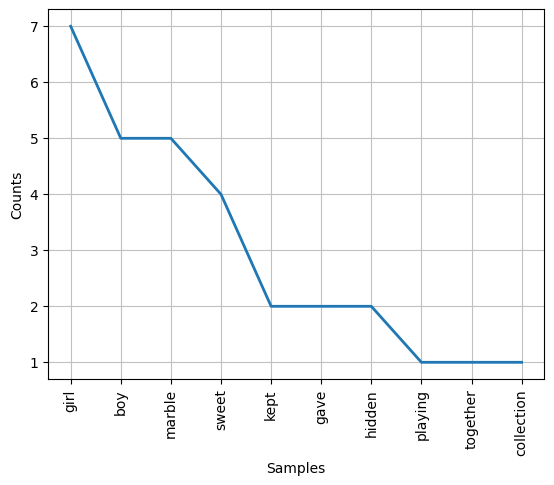

<function matplotlib.pyplot.show(close=None, block=None)>

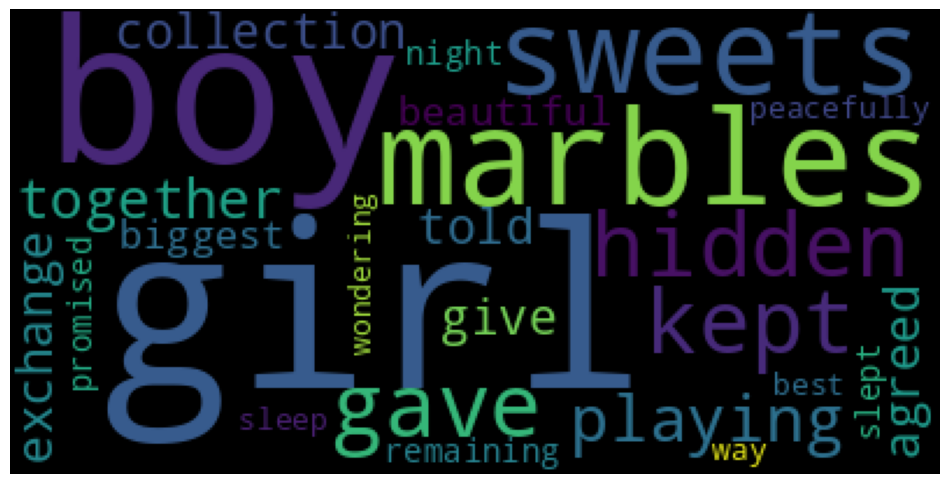

In [16]:
# counting the word occurrence using FreqDist library
freq = FreqDist(words_without_punctuation)
print(freq.most_common(10))

#plot the frequency of words
freq.plot(10)

#plotting the wordcloud
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show


In [17]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer


In [18]:
# assign documents
d0 = 'good boy'
d1 = 'girl good'
d2 = 'boy girl good'

# merge documents into a single corpus
string = [d0, d1, d2]
string

['good boy', 'girl good', 'boy girl good']

In [19]:
# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(string)
result

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [20]:
# get idf values
print('\nidf values:')
feature_names = tfidf.get_feature_names_out()
for ele1, ele2 in zip(feature_names, tfidf.idf_):
    print(ele1, ':', ele2)



idf values:
boy : 1.2876820724517808
girl : 1.2876820724517808
good : 1.0


In [21]:
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())



Word indexes:
{'good': 2, 'boy': 0, 'girl': 1}

tf-idf value:
  (0, 0)	0.7898069290660905
  (0, 2)	0.6133555370249717
  (1, 1)	0.7898069290660905
  (1, 2)	0.6133555370249717
  (2, 1)	0.6198053799406072
  (2, 0)	0.6198053799406072
  (2, 2)	0.48133416873660545

tf-idf values in matrix form:
[[0.78980693 0.         0.61335554]
 [0.         0.78980693 0.61335554]
 [0.61980538 0.61980538 0.48133417]]


In [22]:
import pandas as pd
import sklearn as sk
import math

In [23]:
first_sentence = "Data Science is the best job of the 21st century"
second_sentence = "machine learning is the key for data science"
#split so each word have their own string
first_sentence = first_sentence.split(" ")
second_sentence = second_sentence.split(" ")#join them to remove common duplicate words
total= set(first_sentence).union(set(second_sentence))
print(total)

{'key', 'Data', 'the', 'data', 'science', 'machine', 'best', 'job', 'learning', 'is', '21st', 'for', 'century', 'Science', 'of'}


In [24]:
wordDictA = dict.fromkeys(total, 0)
wordDictB = dict.fromkeys(total, 0)
for word in first_sentence:
    wordDictA[word]+=1

for word in second_sentence:
    wordDictB[word]+=1

In [25]:
wordDictA

{'key': 0,
 'Data': 1,
 'the': 2,
 'data': 0,
 'science': 0,
 'machine': 0,
 'best': 1,
 'job': 1,
 'learning': 0,
 'is': 1,
 '21st': 1,
 'for': 0,
 'century': 1,
 'Science': 1,
 'of': 1}

In [26]:
wordDictB

{'key': 1,
 'Data': 0,
 'the': 1,
 'data': 1,
 'science': 1,
 'machine': 1,
 'best': 0,
 'job': 0,
 'learning': 1,
 'is': 1,
 '21st': 0,
 'for': 1,
 'century': 0,
 'Science': 0,
 'of': 0}

In [27]:
pd.DataFrame([wordDictA, wordDictB])

,key,Data,the,data,science,machine,best,job,learning,is,21st,for,century,Science,of
0,0,1,2,0,0,0,1,1,0,1,1,0,1,1,1
1,1,0,1,1,1,1,0,0,1,1,0,1,0,0,0


In [28]:
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)


In [29]:
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first_sentence)
tfSecond = computeTF(wordDictB, second_sentence)
#Converting to dataframe for visualization
tf = pd.DataFrame([tfFirst, tfSecond])

In [30]:
tf

,key,Data,the,data,science,machine,best,job,learning,is,21st,for,century,Science,of
0,0.000,0.1,0.200,0.000,0.000,0.000,0.1,0.1,0.000,0.100,0.1,0.000,0.1,0.1,0.1
1,0.125,0.0,0.125,0.125,0.125,0.125,0.0,0.0,0.125,0.125,0.0,0.125,0.0,0.0,0.0


In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in wordDictA if not w in stop_words]
print(filtered_sentence)

['key', 'Data', 'data', 'science', 'machine', 'best', 'job', 'learning', '21st', 'century', 'Science']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)

    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / (float(val) + 1))

    return(idfDict)


In [33]:
#inputing our sentences in the log file
idfs = computeIDF([wordDictA, wordDictB])

In [34]:
idfs

{'key': 0.3010299956639812,
 'Data': 0.3010299956639812,
 'the': 0.3010299956639812,
 'data': 0.3010299956639812,
 'science': 0.3010299956639812,
 'machine': 0.3010299956639812,
 'best': 0.3010299956639812,
 'job': 0.3010299956639812,
 'learning': 0.3010299956639812,
 'is': 0.3010299956639812,
 '21st': 0.3010299956639812,
 'for': 0.3010299956639812,
 'century': 0.3010299956639812,
 'Science': 0.3010299956639812,
 'of': 0.3010299956639812}

In [35]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return(tfidf)


In [36]:
#running our two sentences through the IDF:
idfFirst = computeTFIDF(tfFirst, idfs)
idfSecond = computeTFIDF(tfSecond, idfs)
#putting it in a dataframe
idf= pd.DataFrame([idfFirst, idfSecond])
idf

,key,Data,the,data,science,machine,best,job,learning,is,21st,for,century,Science,of
0,0.000000,0.030103,0.060206,0.000000,0.000000,0.000000,0.030103,0.030103,0.000000,0.030103,0.030103,0.000000,0.030103,0.030103,0.030103
1,0.037629,0.000000,0.037629,0.037629,0.037629,0.037629,0.000000,0.000000,0.037629,0.037629,0.000000,0.037629,0.000000,0.000000,0.000000


In [37]:
#first step is to import the library
from sklearn.feature_extraction.text import TfidfVectorizer
#for the sentence, make sure all words are lowercase or you will run #into error. for simplicity, I just made the same sentence all #lowercase
firstV= "Data Science is the sexiest job of the 21st century"
secondV= "machine learning is the key for data science"
#calling the TfidfVectorizer
vectorize= TfidfVectorizer()
#fitting the model and passing our sentences right away:
response= vectorize.fit_transform([firstV, secondV])

In [38]:
# get indexing
print('\nWord indexes:')
print(vectorize.vocabulary_)



Word indexes:
{'data': 2, 'science': 10, 'is': 4, 'the': 12, 'sexiest': 11, 'job': 5, 'of': 9, '21st': 0, 'century': 1, 'machine': 8, 'learning': 7, 'key': 6, 'for': 3}


In [39]:
print(response)

  (0, 1)	0.34211869506421816
  (0, 0)	0.34211869506421816
  (0, 9)	0.34211869506421816
  (0, 5)	0.34211869506421816
  (0, 11)	0.34211869506421816
  (0, 12)	0.48684053853849035
  (0, 4)	0.24342026926924518
  (0, 10)	0.24342026926924518
  (0, 2)	0.24342026926924518
  (1, 3)	0.40740123733358447
  (1, 6)	0.40740123733358447
  (1, 7)	0.40740123733358447
  (1, 8)	0.40740123733358447
  (1, 12)	0.28986933576883284
  (1, 4)	0.28986933576883284
  (1, 10)	0.28986933576883284
  (1, 2)	0.28986933576883284
